## Distance to Annotation

In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys
import scipy.stats as stats
with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]

tss_annotation = doc['tss_annotation']


import os
os.chdir
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *

print('Number of tissues: ',len(tissues))

('Number of tissues: ', 13)


## Plotting attributes

In [2]:
sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
tss = pd.read_csv(tss_annotation,sep='\t',index_col=0)

# i. 
Same strand, merged samples

Mean: 69.4869015238
Std: 465.506138083
Absolute Mean: 366.875340006
Absolute Std: 294.833646269


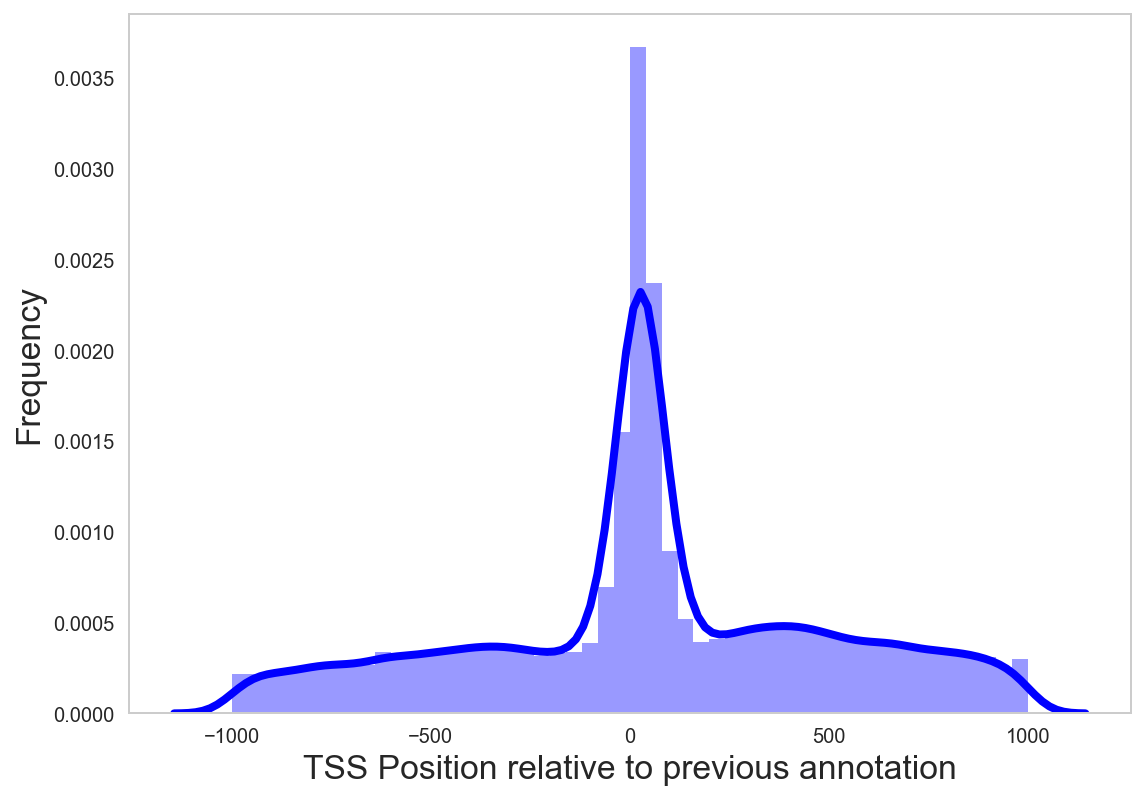

In [4]:
anno_peaks = pd.read_csv('Results/merged/peaks_with_tss_distances.tsv',sep='\t',index_col=0)
anno_peaks = anno_peaks[(~(anno_peaks['Distance to TSS']==np.infty))]
anno_peaks = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 1000]

sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Figure3/Distance_to_Anno/i.png",bbox_inches='tight')

print("Mean: %s" % (np.mean(anno_peaks["Distance to TSS"])))
print("Std: %s" % (np.std(anno_peaks["Distance to TSS"])))

print("Absolute Mean: %s" % (np.mean(np.abs(anno_peaks["Distance to TSS"]))))
print("Absolute Std: %s" % (np.std(np.abs(anno_peaks["Distance to TSS"]))))


# ii.
Using Output TSS1.exp.bed

In [5]:
import annotation

In [6]:
peaks_file = "Results/output/TSS1.exp.bed"

peaks_with_dist = annotation.wrap_distance_to_landmarks(peaks_file, landmark_file=tss_annotation,
                          main_landmark = 'transcript_id',landmark_cols=[],is_bed=True,
                          output_f='Results/Figures/Figure3/Distance_to_Anno/ii.tsv',is_parallel=True,num_par=12)

/data/isshamie/TSS/Analysis/src/annotation.py:114: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  filt2 = np.abs(filt['actual_start'] - peak_start).argmin()
/data/isshamie/TSS/Analysis/src/annotation.py:124: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Distance to TSS', peak_start - landmark_df.loc[filt2, 'actual_start'])
/data/isshamie/TSS/Analysis/src/annotation.py:115: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Nearest TSS', landmark_df.loc[filt2, main_landmark])
/data/isshamie/TSS/Analysis/src/annotation.py:126: FutureWarning: set_value is deprecated and will be removed in a future release. Plea

/data/isshamie/TSS/Analysis/src/annotation.py:127: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'isSameStrand', val['Strand'] == landmark_df.loc[filt2, 'Strand'])
/data/isshamie/TSS/Analysis/src/annotation.py:114: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  filt2 = np.abs(filt['actual_start'] - peak_start).argmin()
/data/isshamie/TSS/Analysis/src/annotation.py:126: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Distance to TSS', landmark_df.loc[filt2, 'actual_start'] - peak_start)
/data/isshamie/TSS/Analysis/src/annotation.py:115: FutureWarning: set_value is deprecated and will be removed in a future 

/data/isshamie/TSS/Analysis/src/annotation.py:124: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Distance to TSS', peak_start - landmark_df.loc[filt2, 'actual_start'])
/data/isshamie/TSS/Analysis/src/annotation.py:127: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'isSameStrand', val['Strand'] == landmark_df.loc[filt2, 'Strand'])


In [14]:
anno_peaks = pd.read_csv('Results/Figures/Figure3/Distance_to_Anno/ii.tsv',sep='\t',index_col=0)
anno_peaks = anno_peaks[(~(anno_peaks['Distance to TSS']==np.infty))]

In [15]:
anno_peaks.shape

(30775, 8)

In [16]:
anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 1000].shape

(30699, 8)

In [35]:
stats.mode?

Mean: -89.0531275386
Std: 396.547319221
Mode: 23.0
Absolute Mean: 283.822778229
Absolute Std: 290.903534637


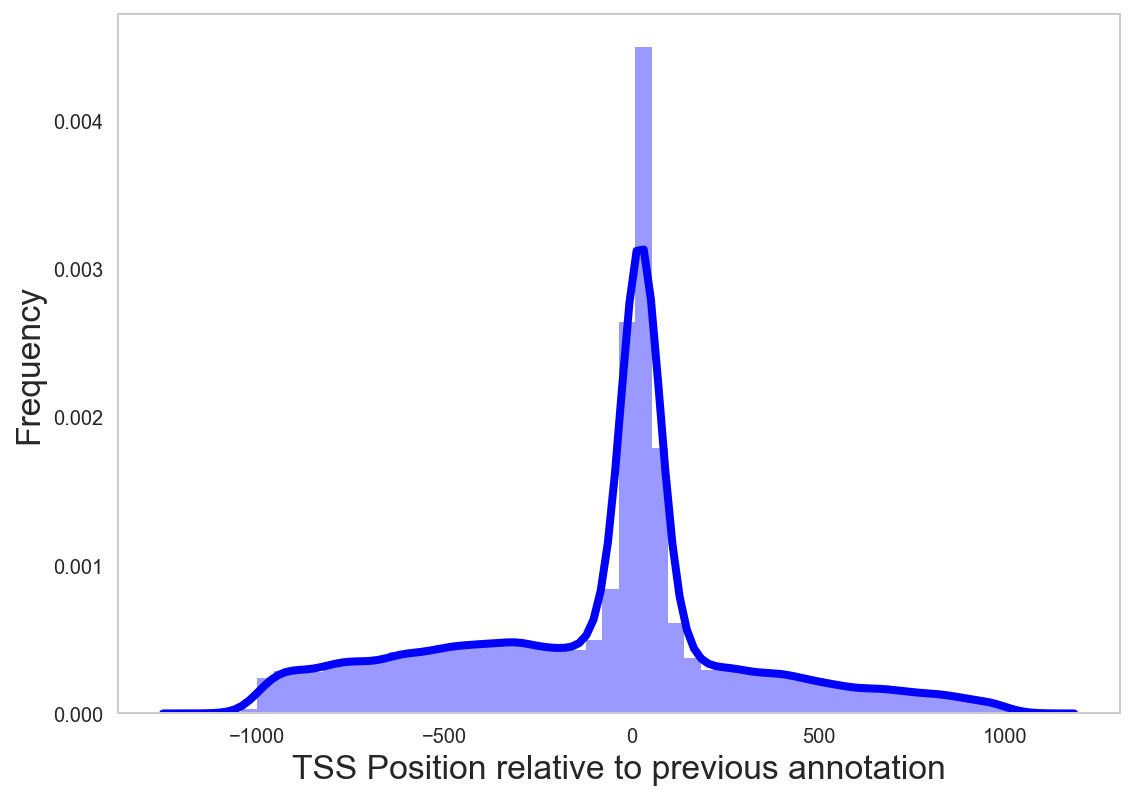

In [34]:
anno_peaks = pd.read_csv('Results/Figures/Figure3/Distance_to_Anno/ii.tsv',sep='\t',index_col=0)
#anno_peaks = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 1000]

sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Figure3/Distance_to_Anno/ii.png",bbox_inches='tight')

print("Mean: %s" % (np.mean(anno_peaks["Distance to TSS"])))
print("Std: %s" % (np.std(anno_peaks["Distance to TSS"])))
print("Mode: %s" % (stats.mode(anno_peaks["Distance to TSS"])[0][0]))

print("Absolute Mean: %s" % (np.mean(np.abs(anno_peaks["Distance to TSS"]))))
print("Absolute Std: %s" % (np.std(np.abs(anno_peaks["Distance to TSS"]))))


ModeResult(mode=array([ 27.]), count=array([95]))


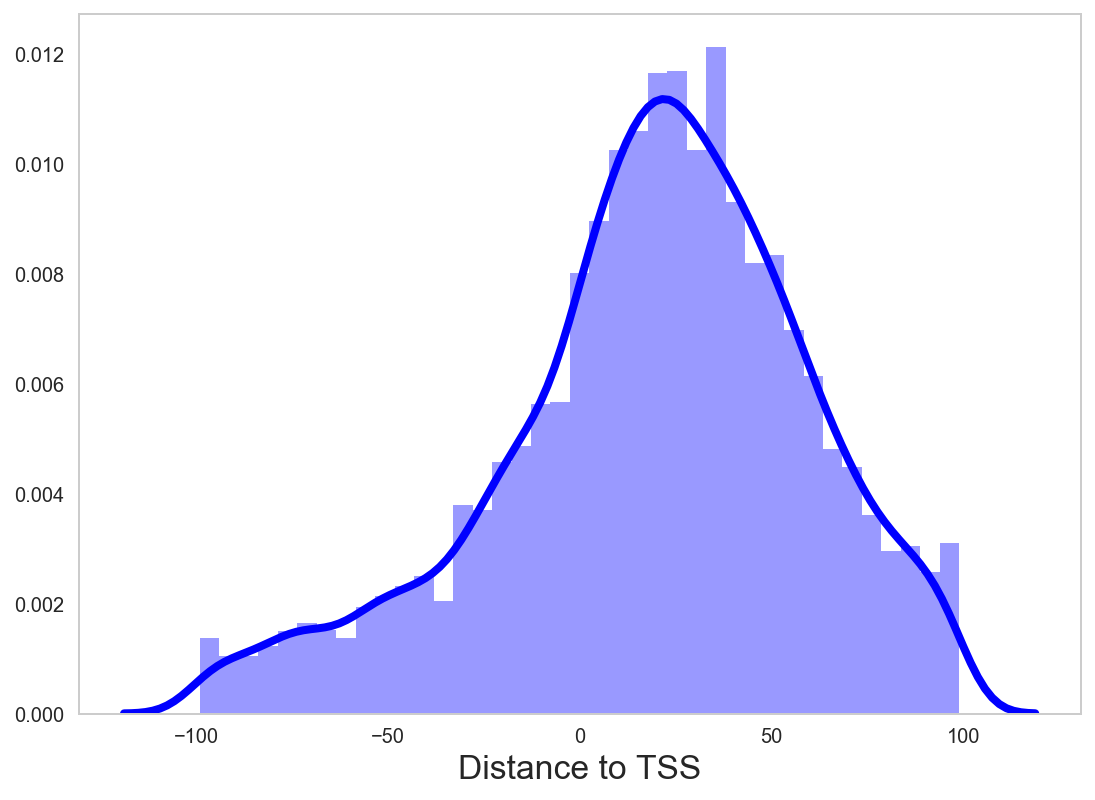

In [26]:
curr = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 100]

sns.distplot(curr[curr["Strand"] == "-"]['Distance to TSS'])
print(stats.mode(curr[curr["Strand"] == "-"]['Distance to TSS']))

ModeResult(mode=array([ 16.]), count=array([98]))


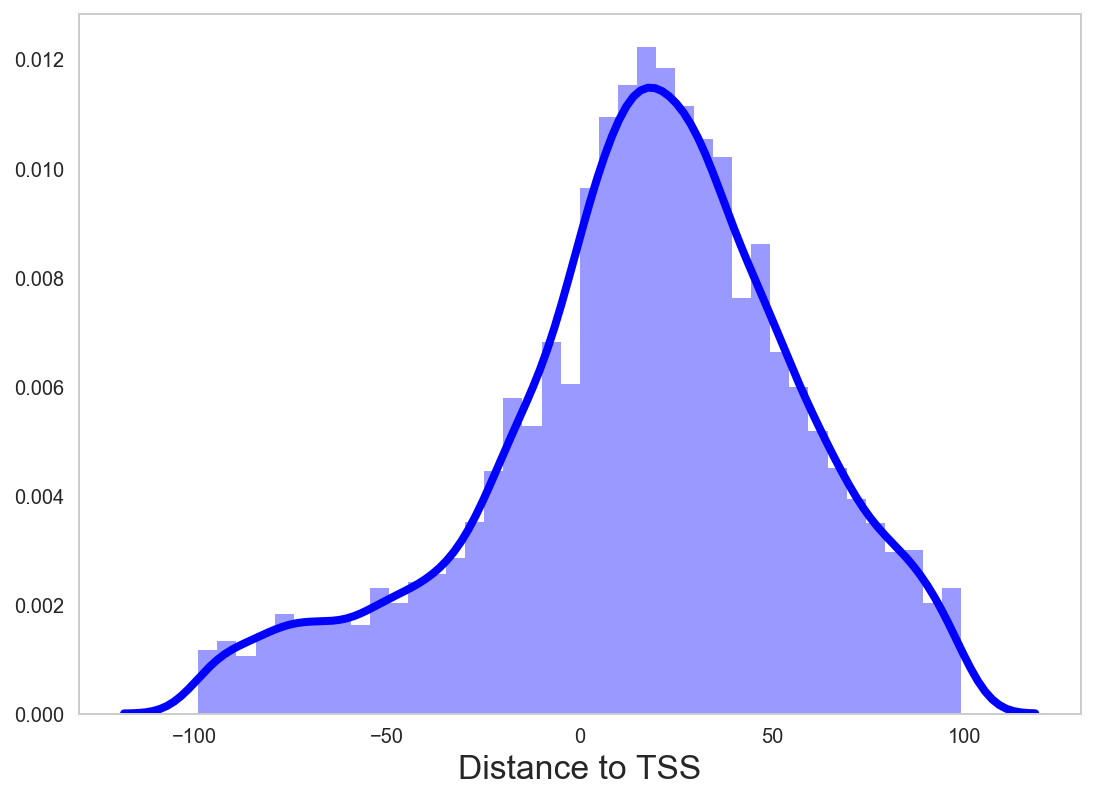

In [25]:
curr = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 100]

sns.distplot(curr[curr["Strand"] == "+"]['Distance to TSS'])
print(stats.mode(curr[curr["Strand"] == "+"]['Distance to TSS']))

# iii.
## With only peak1

In [9]:
import Homer

In [10]:
peaks_file = "Results/output/TSS1.exp.bed"
df = Homer.read_bed_file(peaks_file)
df = df[df.index.str.contains("p1@")]
out = "TSS1_only_peak1.exp.bed"
df["ID"] = df.index
df = df[["Chr", "Start","End","ID","Stat","Strand"]]
df.to_csv(out,sep="\t",header=None,index=None)


peaks_with_dist = annotation.wrap_distance_to_landmarks(out, landmark_file=tss_annotation,
                          main_landmark = 'transcript_id',landmark_cols=[],is_bed=True,
                          output_f='Results/Figures/Figure3/Distance_to_Anno/iii.tsv',is_parallel=True,num_par=12)

/data/isshamie/TSS/Analysis/src/annotation.py:114: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  filt2 = np.abs(filt['actual_start'] - peak_start).argmin()
/data/isshamie/TSS/Analysis/src/annotation.py:124: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Distance to TSS', peak_start - landmark_df.loc[filt2, 'actual_start'])
/data/isshamie/TSS/Analysis/src/annotation.py:115: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Nearest TSS', landmark_df.loc[filt2, main_landmark])
/data/isshamie/TSS/Analysis/src/annotation.py:126: FutureWarning: set_value is deprecated and will be removed in a future release. Plea

/data/isshamie/TSS/Analysis/src/annotation.py:127: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'isSameStrand', val['Strand'] == landmark_df.loc[filt2, 'Strand'])
/data/isshamie/TSS/Analysis/src/annotation.py:114: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  filt2 = np.abs(filt['actual_start'] - peak_start).argmin()
/data/isshamie/TSS/Analysis/src/annotation.py:127: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'isSameStrand', val['Strand'] == landmark_df.loc[filt2, 'Strand'])
/data/isshamie/TSS/Analysis/src/annotation.py:115: FutureWarning: set_value is deprecated and will be removed in a future relea

/data/isshamie/TSS/Analysis/src/annotation.py:126: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'Distance to TSS', landmark_df.loc[filt2, 'actual_start'] - peak_start)
/data/isshamie/TSS/Analysis/src/annotation.py:127: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  anno_peaks.set_value(ind, 'isSameStrand', val['Strand'] == landmark_df.loc[filt2, 'Strand'])


Mean: -35.1474884737
Std: 297.891757667
Absolute Mean: 180.158699345
Absolute Std: 239.828455947


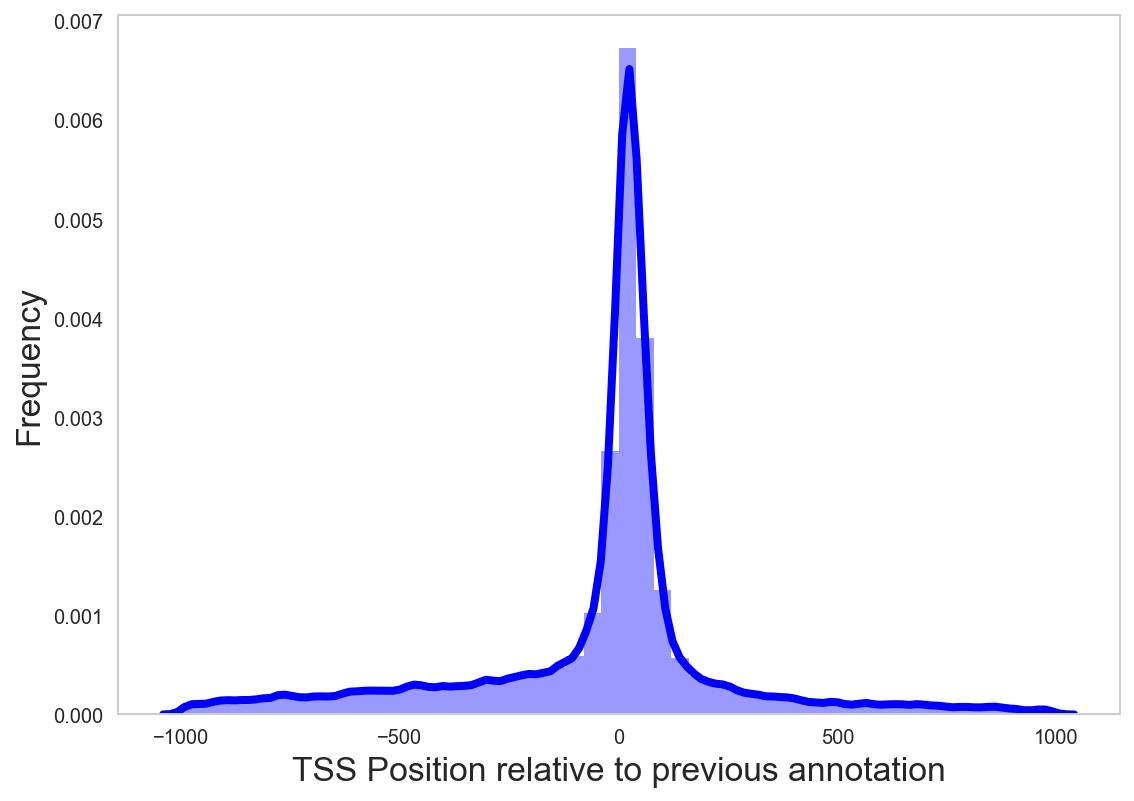

In [11]:

anno_peaks = pd.read_csv('Results/Figures/Figure3/Distance_to_Anno/iii.tsv',sep='\t',index_col=0)
anno_peaks = anno_peaks[(~(anno_peaks['Distance to TSS']==np.infty))]
anno_peaks = anno_peaks[np.abs(anno_peaks['Distance to TSS'])< 1000]

sns.distplot(anno_peaks[anno_peaks['isSameStrand']]['Distance to TSS'])

plt.ylabel('Frequency')
plt.xlabel('TSS Position relative to previous annotation')

plt.savefig("Results/Figures/Figure3/Distance_to_Anno/iii.png",bbox_inches='tight')

print("Mean: %s" % (np.mean(anno_peaks["Distance to TSS"])))
print("Std: %s" % (np.std(anno_peaks["Distance to TSS"])))

print("Absolute Mean: %s" % (np.mean(np.abs(anno_peaks["Distance to TSS"]))))
print("Absolute Std: %s" % (np.std(np.abs(anno_peaks["Distance to TSS"]))))

In [12]:
(np.abs(anno_peaks["Distance to TSS"]) > 150).sum()

6662

In [13]:
anno_peaks.shape

(20605, 8)

# iv. Remove genes that are back-to-back with another gene